# **Laboratorio 5: Una introducción a la optimización**
**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2440:** Fundamentos del machine learning


**Nombres de los integrantes**


1.  Laura Julieth Carretero Serrano
2.  Juan David Rios Nisperuza

**Número del grupo**

*3*




# **Paquete optimize de SciPy** 

**SciPy** acrónimo de *Scientific Python* es una libreria de Python especializada en cálculos técnicos y científicos que hace uso de *Numpy* dentro de su implementación interna. 

Dentro de los muchos módulos que contiene **SciPy** nos interesa en particular *optimize* que proporciona distintas herramientas para calcular las raíces y valores mínimos (o máximos) de funciones matemáticas, hacer ajuste de curvas, resolver sistemas de ecuaciones y atender otras formas de optimización. En este módulo, una de las funciones más útiles es *minimize_scalar()* que permite minimizar funciones escalares y *minimize()* que hace lo propio para campos escalares. Veamos cómo  se puede utilizar esta función para resolver problemas simples de optimización:

A continuación se describen los argumentos de la función para su funcionamiento y se da un ejemplo de cálculo de minimizadores usando *minimize*.

En primer lugar, importamos la función *minimize()* del paquete *optimize* de **SciPy**:

In [90]:
from scipy.optimize import minimize

La función *minimize()* responde a la siguiente sintaxis:

```
minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
```

**Argumentos obligatorios:** 

- *fun*: Permite pasar la función objetivo, aquella que se desea minimizar. *La función objetivo debe implementarse a través de una función de Python que reciba por argumento un arreglo y retorne un valor escalar. Una vez definida la función se pasa como valor del argumento fun el nombre asignado*. Si por ejemplo se desea minimizar una función de 3 variables, la función de Python no debe recibir 3 argumentos sino un solo argumento X, un array de 3 elementos de modo que cada elemento represente a cada una de las variables independientes, es decir:

***Forma incorrecta:***

```
def funcion_objetivo(x,y,z):
  return x + y + z
```
***Forma correcta:***

```
def funcion_objetivo(X):
  x,y,z = X
  return x + y + z
```
Otra alternativa, menos explícita, puede ser: 

```
def funcion_objetivo(X):
  return X[0] + X[1] + X[2]
```


- *X0*: Es un arreglo de *Numpy* (o una *lista de Python* que contenga solamente números) que representa el punto inicial desde el cual inicia el proceso de optimización. Es un argumento obligatorio puesto que los métodos numéricos que utiliza *minimize()* para hallar los valores mínimos necesitan de un punto de partida para desarrollarse. Si la función tiene múltiples mínimos este argumento acelera la convergencia del método al evitar que se caiga en mínimos locales no deseados. 

```
def funcion_objetivo(X, p):
  x,y,z = X
  return x*p + y + z

x0 = np.array([2, 3]) 
resultado = minimize(funcion_objetivo, x0)
```
*Estos son los argumentos mínimos que exige la función mínimize() para operar.*

**Argumentos opcionales** (Mencionamos aquellos que se encuentran dentro del alcance de un curso introductorio):

- *method*: Recibe como un *string* el nombre del método numérico que se desea utilizar para calcular el valor minimo de la función objetivo. Se puede elegir uno entre los 15 de los que dispone *minimize()* (ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize para más información). La elección de un método particular obedece a las condiciones específicas del problema, el tipo de función y la presencia de restricciones. Por defecto *SciPy* pasa "BGFS" (Broyden-Fletcher-Goldfarb-Shanno algorithm),"L-BFGS-B" ó "SLSQP" (Sequential Least Squares Programming) según el problema incluya o no restricciones o límites. **Para este curso vamos a dejar a SciPy elegir el método por defecto.**

- *args*: Una tupla donde cada elemento corresponde a los parámetros adicionales de la función objetivo. Por ejemplo, si se tiene una función que recibe 3 variables y un parámetro p, la definición correcta de la función objetivo debería ser:

```
def funcion_objetivo(X, p):
  x,y,z = X
  return x*p + y + z
```

Y en este caso, al invocar la función *minimize()*, se debe incluir el argumento *args* como una tupla de un elemento que contiene el valor correspondiente al parámetro p. Asumiendo que p tiene un valor de 0.2, la sintaxis correcta sería la siguiente:

```
argumentos = (0.2,)
x0 = np.array([2, 3]) 
resultado = minimize(funcion_objetivo, x0, args=argumentos)
```

- *bounds*: Permite especificar los límites máximo y mínimo de cada una de las varibles independientes de la función objetivo a través de una lista de tuplas, cada tupla de la forma *(min, max)*. Si se usa *None* en alguno de los límites se asume que la variable no tiene límite inferior o superior dependiendo el caso. Por ejemplo, si tenemos una función objetivo de 3 variables en donde la primera variable debe estar en el rango (10,20), la segunda variable debe ser mayor a 0 y la tercera variable debe ser menor a 10, la sintaxis correcta para el argumento *bounds* sería de la forma:

```
def funcion_objetivo(X, p):
  x,y,z = X
  return x*p + y + z

x0 = np.array([2, 3]) 
limites = [(10,20),(0,None),(None,10)]
resultado = minimize(funcion_objetivo, x0, bounds = limites)
```

- *constraints*: Permite especificar las restricciones (o ligaduras) a las que está sujeta la optimización de la función objetivo. Cada restricción se define como un diccionario de Python con las llaves *type* (un String que especifíca el tipo de restricción: "eq" para igualdad, "ineq" para desigualdad), *fun* (que tiene por valor el nombre de una función en Python que implementa la restricción y sigue las mismas condiciones impuestas a la definición de la función objetivo --Importante: *Todas las restricciones deben despejarse de modo que la igualdad o desigualdad quede expresada en función a su relación con cero, si es una inecuación (una desigualdad) debe expresarse como $\geq$ 0 (no - negativa) y en caso de una ecuación se iguala directamente a cero*--) y finalmente *args* (que permite pasar parámetros adicionales a las restricciones a través de una tupla, funciona de la misma forma que el argumento *args* descrito anteriormente para la función objetivo). Si se tiene más de una restricción, se agrega cada uno de los diccionarios que las definen a una lista de Python que finalmente se pasa como valor general del argumento *constraints*. Para información más detallada, remítase a la documentación: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

Parece un poco críptico, veamos su uso mediante un ejemplo:

Asuma que se tiene un problema de optimización con una función de 3 variables y las siguientes restricciones:

\begin{align}
4 x_1 + 3 x_2 - x_3 \geq 4 \\
x_1 + x_2 = 10
\end{align}

Lo primero que hacemos es expresar las restricciones en relación con el número cero, es decir:

\begin{align}
4 x_1 + 3 x_2 - x_3 - 4 \geq 0 \\
x_1 + x_2 - 10 = 0
\end{align}

Ahora, definimos cada restricción como una función de Python que toma por argumento un arreglo sobre las variables independientes y retorna un valor escalar -*las mismas condiciones impuestas a la función objetivo descritas anteriormente*-. En este caso, las funciones de restricción son:

```
def restriccion_1(X):
    x_1, x_2, x_3 = X
    return 4*x_1 + 3*x_2 - x_3 - 4
```
```
def restriccion_2(X):
    x_1, x_2, x_3 = X
    return x_1 + x_2 - 10
```

**Note que las funciones definidas retornan el valor de la igualdad y de la desigualdad en relación con cero, es decir, luego del despeje que hicimos en el paso anterior.**

Una vez definidas las funciones de restricción, construimos el diccionario para cada una con al menos 2 llaves: *type* y *fun*. Veamos como quedarían:

```
rest1 = {"type":"ineq","fun":restriccion_1}
rest2 = {"type":"eq","fun":restriccion_2}

```
Observen que el argumento *type* para la primera restricción es *"ineq"* puesto que se trata de una desigualdad y "*eq*" para la segunda restricción, al tratarse de una igualdad. Dado que tenemos más de una restricción, creamos una lista de Python que contenga los diccionarios ya definidos para finalmente ingresarlos al parámetro *constraints*:

```
restricciones = [rest1, rest2]

```

El código completo del ejercicio se vería así:

```

def funcion_objetivo(X):
  x,y,z = X
  return x + y + z

def restriccion_1(X):
    x_1, x_2, x_3 = X
    return 4*x_1 + 3*x_2 - x_3 - 4

def restriccion_2(X):
    x_1, x_2, x_3 = X
    return x_1 + x_2 - 10

rest1 = {"type":"ineq","fun":restriccion_1}
rest2 = {"type":"eq","fun":restriccion_2}
restricciones = [rest1, rest2]

x0 = np.array([2, 3]) 


resultado = minimize(funcion_objetivo, x0, constraints=restricciones)

```


**Resultado de la función *minimize()*:**

Luego de ejecutarse, la función *minimize()* retorna un diccionario con llaves *x* (Un arreglo de Numpy que contiene la solución hallada i.e. el valor mínimo para las variables independientes), *success* (Un valor booleano que indica si la solución fue éxitosa --es decir, si el método utilizado pudo converger), *message* (Un mensaje que describe la causa de terminación de la ejecución del algoritmo), *nit* (Número de iteraciones que le tomó al método para coverger a la solución) y *fun* (El valor de la función evaluado en el valor mínimo).

**Nota**: Al valor numérico hallado que minimiza una función objetivo se le conoce como *Minimizador* en el contexto de Machine Learning, del mismo modo al método numérico o algoritmo utilizado para optimizar una función objetivo se le conoce como *Optimizador*.

**Ejercicio de Ejemplo**

Asuma que se quiere minimizar la función $y = 3(x_1 - 10)^2 + 4(x_2 - 5)^2$ sujeto a la condición $x_1^2+x_2^2 \leq 9$ con $x_1 \geq 1$ y $x_2 \geq 2$.

In [91]:
#En primer lugar, importamos la función minimize de SciPy así como Numpy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [92]:
#En primer lugar, definimos la función objetivo a minimizar
def funcion_objetivo(X):
  return 3*(X[0] - 10)**2 + 4*(X[1] - 5)**2

In [93]:
#Definimos las restricciones y límites de acuerdo al formato indicado por minimize
def restriccion_1(X):
  return 9 - X[0] ** 2 - X[1]**2 # Recuerden que debemos expresar la restriccion de la forma >= 0

constraints = [{"type":"ineq","fun":restriccion_1},]
boundaries = [(1, None),(2, None)]

#Definimos el punto de partida para el proceso de minimización
x0 = [5,5]

In [94]:
#Finalmente ejecutamos la función minimize
minimization_f = minimize(funcion_objetivo, x0, bounds=boundaries, constraints=constraints)

In [95]:
# Imprimimos los resultados del proceso
print(f"Minimizador para X1 y X2 bajo la restricción impuesta: {minimization_f["x"]}")
print(f"Valor de la función en el mínimo hallado: {minimization_f["fun"]}")
print(f"Resultado de la convergencia del método: {minimization_f["success"]}")
print(f"Número de iteraciones que le tomo al método para converger: {minimization_f["nit"]}")


Minimizador para X1 y X2 bajo la restricción impuesta: [2.23606798 2.        ]
Valor de la función en el mínimo hallado: 216.83592130158132
Resultado de la convergencia del método: True
Número de iteraciones que le tomo al método para converger: 7


**1.1 Ejercicios**

**1.** Grafique la región $x_1^2+x_2^2 <= 9$ e incorpore los límites $x_1 >= 1$ y $x_2 >= 2$, marque la región resultante. Agregue un título relacionado así como etiquetas en los ejes.

*Hint:* Las funciones *axhline()* y *axvhline()* nos permiten dibujar líneas horizontales y verticales en el gráfico.
¿De qué otra forma podemos gráficar la región definida por la ecuación  $x_1^2+x_2^2 <= 9$ sin usar el método *ax.plot()*?

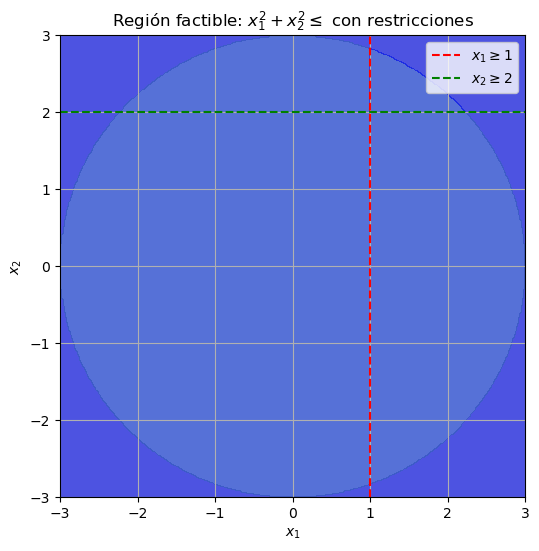

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores para x1 y x2
# Se elige el rango [-3,3] porque el círculo tiene radio 3, 
# por lo que la región relevante está contenida en este intervalo.
# 400 puntos para una mejor visualización
x1 = np.linspace(-3, 3, 400)  
x2 = np.linspace(-3, 3, 400)  
X1, X2 = np.meshgrid(x1, x2)  # Se crea una malla con estos valores

# Definir la función del círculo
# La condición X1**2 + X2**2 <= 9 genera una matriz booleana
# que indica qué puntos están dentro del círculo de radio 3.
region = X1**2 + X2**2 <= 9
region_factible = (X1**2 + X2**2 <= 9) & (X1 >= 1) & (X2 >= 2)

plt.figure(figsize=(6,6))  # Se define el tamaño del gráfico 

# Graficar la región con contourf
# Se usa contourf para rellenar la región factible en lugar de trazar el contorno
# - `region` es una matriz booleana (True dentro del círculo, False fuera)
# - `levels=1` indica que solo queremos una única región sombreada

plt.contourf(X1, X2, region, levels=1, alpha=0.5)
plt.contourf(X1, X2, region_factible, levels=1, colors=['blue'], alpha=0.5)

# Dibujar las líneas límite
plt.axvline(x=1, color='red', linestyle='--', label=r'$x_1 \geq  1$')  
# Línea vertical en x1 = 1 (restricción de la región)
plt.axhline(y=2, color='green', linestyle='--', label=r'$x_2 \geq  2$')  
# Línea horizontal en x2 = 2 (restricción de la región)

# Etiquetas y título
plt.xlabel(r'$x_1$')  
plt.ylabel(r'$x_2$')  
plt.title(r'Región factible: $x_1^2 + x_2^2 \leq $ con restricciones')  

# Ajustar límites y agregar leyenda
plt.xlim(-3, 3)  # Se establecen los límites del gráfico según el radio del círculo
plt.ylim(-3, 3)  
plt.legend()  # Se muestra la leyenda con las restricciones
plt.grid()  # Se añade una cuadrícula para facilitar la visualización
plt.show()  # Se muestra el gráfico final




**2.** Grafique las curvas de nivel para la función objetivo del ejercicio de ejemplo. Tome los límites $x_1 \in [-4,4], x_2 \in [-4,4]$ y considere 20 niveles de profundidad. Agregue un título relacionado así como etiquetas en los ejes.

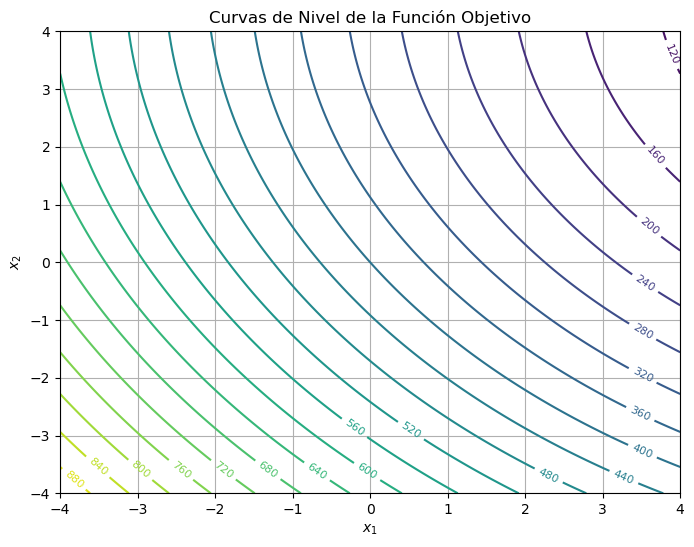

In [97]:
# Definir la función objetivo que queremos minimizar.
# Esta función representa la ecuación dada en el ejercicio de ejemplo.
def funcion_objetivo(coordenada_x1, coordenada_x2):
    return 3 * (coordenada_x1 - 10) ** 2 + 4 * (coordenada_x2 - 5) ** 2

# Definir los límites de los ejes para la gráfica.
# Se toman valores de x1 y x2 en el rango de [-4, 4] con 100 puntos.
valores_x1 = np.linspace(-4, 4, 100)
valores_x2 = np.linspace(-4, 4, 100)

# Crear una malla de puntos con los valores de x1 y x2.
malla_x1, malla_x2 = np.meshgrid(valores_x1, valores_x2)

# Evaluar la función objetivo en cada punto de la malla.
valores_funcion_objetivo = funcion_objetivo(malla_x1, malla_x2)

# Graficar las curvas de nivel de la función objetivo.
plt.figure(figsize=(8, 6))  # Definir el tamaño de la figura.
contorno_curvas_nivel = plt.contour(malla_x1, malla_x2, valores_funcion_objetivo, levels=20, cmap = 'viridis')  # Dibujar 20 curvas de nivel.
plt.clabel(contorno_curvas_nivel, inline=True, fontsize=8)  # Agregar etiquetas a las curvas de nivel.
plt.title("Curvas de Nivel de la Función Objetivo")  # Título de la gráfica.
plt.xlabel("$x_1$")  # Etiqueta del eje x.
plt.ylabel("$x_2$")  # Etiqueta del eje y.
plt.grid(True)  # Agregar una cuadrícula para facilitar la visualización.
plt.show()  # Mostrar la gráfica generada.

**3.** En un mismo gráfico, dibuje la región de interés y las curvas de nivel de la función objetivo. Finalmente muestre el minimizador que se calculó con la función minimize en el ejercicio de ejemplo. Agregue un título relacionado así como etiquetas en los ejes.

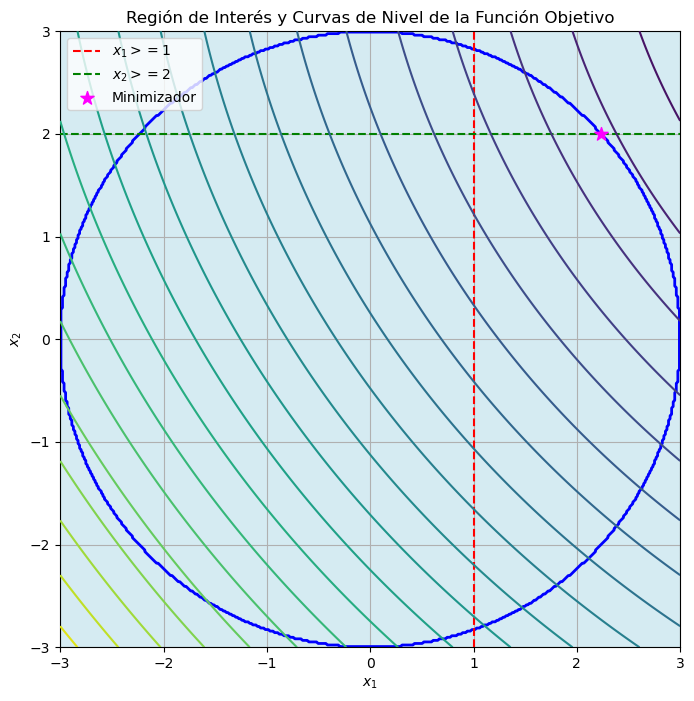

In [98]:
import numpy as np
import matplotlib.pyplot as plt
# Definir el rango de valores para x1 y x2 (usamos el mismo dominio para todos los elementos)
x = np.linspace(-3, 3, 400)
X1, X2 = np.meshgrid(x, x)

# Definir la región: puntos dentro del círculo de radio 3
region = X1**2 + X2**2 <= 9

# Definir la función objetivo
def funcion_objetivo(x1, x2):
    return 3 * (x1 - 10) ** 2 + 4 * (x2 - 5) ** 2

# Evaluar la función objetivo en la malla definida
F = funcion_objetivo(X1, X2)

# Crear la figura
plt.figure(figsize=(8,8))

# Dibujar la región de interés:
# Relleno del interior del círculo en azul claro
plt.contourf(X1, X2, region, levels=1, colors=['lightblue'], alpha=0.5, zorder=1)

# Dibujar el contorno (delimitación) del círculo
plt.contour(X1, X2, region, levels=[0.5], colors='blue', linewidths=2, zorder=2)

# Dibujar las líneas de restricción
plt.axvline(x=1, color='red', linestyle='--', label=r'$x_1 >= 1$', zorder=3)
plt.axhline(y=2, color='green', linestyle='--', label=r'$x_2 >= 2$', zorder=3)

# Dibujar las curvas de nivel de la función objetivo sobre la región
contornos = plt.contour(X1, X2, F, levels=20, cmap="viridis", zorder=4)

# Graficar el minimizador (punto) sobre la gráfica con zorder alto para que se vea por encima
minimizer = minimization_f["x"]
plt.scatter(minimizer[0], minimizer[1], color='magenta', s=100, marker='*', label='Minimizador', zorder=10)

# Configurar etiquetas, título, límites y leyenda
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("Región de Interés y Curvas de Nivel de la Función Objetivo")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


**4.**  ¿El minimizador hallado con *minimize()* corresponde efectivamente al valor mínimo dentro de la región de interés?, ¿Que pasaría con el valor mínimo si las restricciones fueran removidas?

In [ ]:
print("Valor del minimizador evaludado para la restricción 1: ", restriccion_1(minimization_f["x"]))
print("El resultado negativo (-360) indica que la solución encontrada no cumple la restricción,\n"
      "ya que la suma de los cuadrados de las variables excede el valor permitido de 9,\n"
      "situando el punto fuera de la región factible.")


Valor del minimizador evaludado para la restricción 1:  -360.0000000425798
El resultado negativo (-360) indica que la solución encontrada no cumple la restricción, ya que la suma de los cuadrados de las variables excede el valor permitido de 9, situando el punto fuera de la región factible.


**2. Resolución de un problema de optimización**

El Hospital San Juan de Dios desea determinar cuál es el número de diagnósticos para cada procedimiento (Respiratorio, Coronarias, Partos y Adicciones) que le permitirá maximizar su utilidad. Para cada diagnóstico se ha establecido el número de recursos que requiere (Horas de diagnóstico, días en camas UCI, cuidados de enfermería, días-cama), la disponibilidad total de cada recurso y el margen de utilidad de cada procedimiento. Además, se sabe que el hospital debe atender un mínimo número de casos en estos diagnósticos. La siguiente tabla resume toda la información:


|  Recursos             | Respiratorio | C.Coronarias | Partos | Adicciones | Disponibilidad |
|-----------------------|--------------|--------------|--------|------------|----------------|
| Horas de diagnóstico  | 7            | 10           | 2      | 1          |  325           |
| Dias cama UCI         | 1            | 2.5          | 0.5    | 0          |  55            |
| Dias - cama           | 5            | 7            | 2      | 7          |  420           |
| Cuidados de enfermería| 50           | 88           | 27     | 50         |  3800          |
| Margen de utilidad    | 40           | 250          | 30     | 5          |                |
| Casos Mínimos         | 15           | 10           | 20     |            |                |

**2.1.** Ejercicios

**1.** Defina la función objetivo y las restricciones asociadas de acuerdo a la información anterior.

In [101]:
def funcion_objetivo(X, sing=-1.0):
    return sing*(40*X[0]+250*X[1]+30*X[2]+5*X[3])   #Función objetivo

def restriccion_horasdiagnostico_dis(X):
    return 325-(7*X[0]+10*X[1]+2*X[2]+1*X[3])#Restricción de disponibilidad de materiales

def restriccion_diascamauci_dis(X):
    return 55-(X[0]+2.5*X[1]+0.5*X[2]) #Restricción de disponibilidad de camas

def restriccion_diascama_dis(X):
    return 420-(5*X[0]+7*X[1]+2*X[2]+7*X[3]) #Restricción de disponibilidad de camas

def restriccion_cuidados_dis(X):
    return 3800-(50*X[0]+88*X[1]+27*X[2]+50*X[3])



constraints = [{"type":"ineq","fun":restriccion_horasdiagnostico_dis},
               {"type":"ineq","fun":restriccion_diascamauci_dis},
               {"type":"ineq","fun":restriccion_diascama_dis},
               {"type":"ineq","fun":restriccion_cuidados_dis}]

**2.** Defina los límites para cada una de las variables independientes (bounds)

In [102]:
boundaries = [(15, None),(10,None ),(20,None),(0,None)]

x0=[1,1,1,1]

**3.** Calcule el minimizador haciendo uso de la función *minimize()* de **SciPy**

In [103]:
minimization_f = minimize(funcion_objetivo, x0, bounds=boundaries, constraints=constraints)

**4.** Imprima el minimizador calculado, evalue y muestre que se cumplen cada una de las restricciones del problema.

In [104]:
# Imprimimos los resultados del proceso
print(f"Minimizador para X1 y X2 bajo la restricción impuesta: {minimization_f["x"]}")
print(f"Valor de la función en el mínimo hallado: {minimization_f["fun"]}")
print(f"Resultado de la convergencia del método: {minimization_f["success"]}")
print(f"Número de iteraciones que le tomo al método para converger: {minimization_f["nit"]}")


Minimizador para X1 y X2 bajo la restricción impuesta: [15.   12.   20.   29.08]
Valor de la función en el mínimo hallado: -4345.400000407198
Resultado de la convergencia del método: True
Número de iteraciones que le tomo al método para converger: 5
